# 1. Import Libraries

In [59]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # Data processing, CSV file I/O (e.g., pd.read_csv)
import numpy as np  # Numerical computations and array manipulations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced statistical data visualization
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing sets

# Ensuring consistent visualization style
sns.set_style("darkgrid")

# 2. Import Data Set

In [60]:
# Importing the Customer Lifetime Value dataset
# Ensure the file is in the correct directory or provide the full file path if necessary
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

# Display the first few rows to verify successful loading
df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [61]:
from sklearn.impute import SimpleImputer
# Standardize column names (removes spaces and converts to lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop duplicate rows
df = df.drop_duplicates()

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

# Handle missing values
num_imputer = SimpleImputer(strategy='median')  # Median for numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # Most frequent for categorical columns

# Apply imputation for missing values
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# Display cleaned dataset before EDA
from IPython.display import display
print(" Cleaned Dataset (After Handling Missing Values & Duplicates):")
display(df.info(), df.head())


 Cleaned Dataset (After Handling Missing Values & Duplicates):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   float64
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null 

None

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 3. EDA

## 3.1 Summary Statistics

In [62]:
# Generating summary statistics for numerical columns in the dataset
summary_statistics = df.describe()

# Displaying the summary statistics
summary_statistics

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## 3.2 Data Information

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   float64
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   f

## 3.3 Numerical and Categorical Data

In [64]:
# Separating numerical and categorical columns for better analysis
numeric_data = df.select_dtypes(include=[np.number])  # Selecting only numeric columns
categorical_data = df.select_dtypes(exclude=[np.number])  # Selecting only categorical columns

# Displaying the first few rows of numeric data to verify the selection
numeric_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879


In [65]:
# Displaying the first few rows of categorical data to verify the selection
categorical_data.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 3.4 State-wise Distribution

In [67]:
# Counting occurrences of unique values in the 'State' column
state_counts = df['state'].value_counts()

# Displaying the state-wise distribution
state_counts


state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

## 3.5 Unique Value Counts for Categorical Attributes

In [68]:
# Iterating through all categorical attributes to display unique value counts
for attribute in categorical_data.columns:  # Ensuring iteration over column names explicitly
    print("=" * 50)  # Separator for better readability
    print(f"Attribute: {attribute}")  # Displaying the column name
    print("Value Counts:")
    print(df[attribute].value_counts())  # Displaying unique value counts
    print(f"Number of Unique Categories: {df[attribute].nunique()}")  # More direct approach
    print("=" * 50)  # Separator for better readability
    print()  # Extra line for spacing


Attribute: customer
Value Counts:
customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64
Number of Unique Categories: 9134

Attribute: state
Value Counts:
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
Number of Unique Categories: 5

Attribute: response
Value Counts:
response
No     7826
Yes    1308
Name: count, dtype: int64
Number of Unique Categories: 2

Attribute: coverage
Value Counts:
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
Number of Unique Categories: 3

Attribute: education
Value Counts:
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
Number of Unique Categories: 5

Attribute: effective_to_

# 4. Data Visualization

## 4.1 Histograms for Numerical Attributes

<Figure size 2000x1500 with 0 Axes>

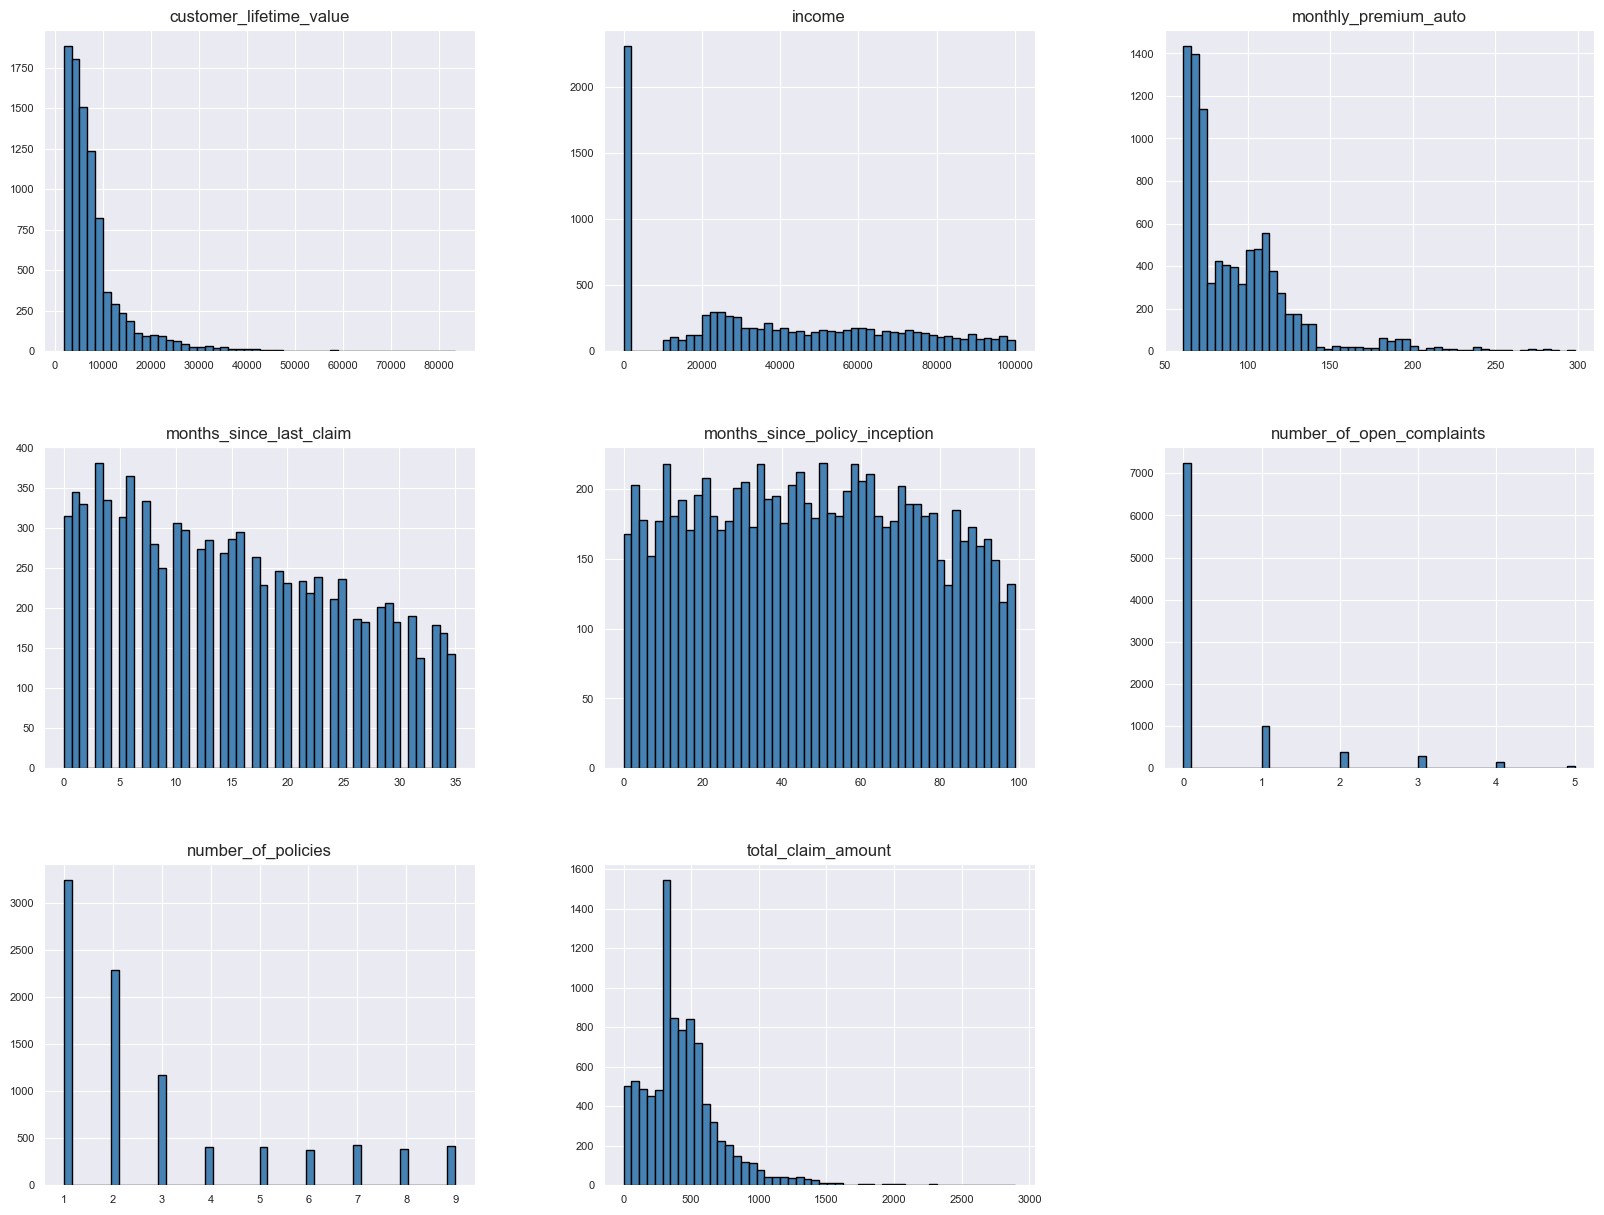

In [69]:
import matplotlib.pyplot as plt

# Generating histograms for all numerical attributes in the dataset
plt.figure(figsize=(20, 15))  # Setting figure size for better visualization
df.hist(bins=50, figsize=(20, 15), color='steelblue', edgecolor='black', grid=True)

# Displaying the plots
plt.show()


## 4.2 Distribution of Number of Open Complaints

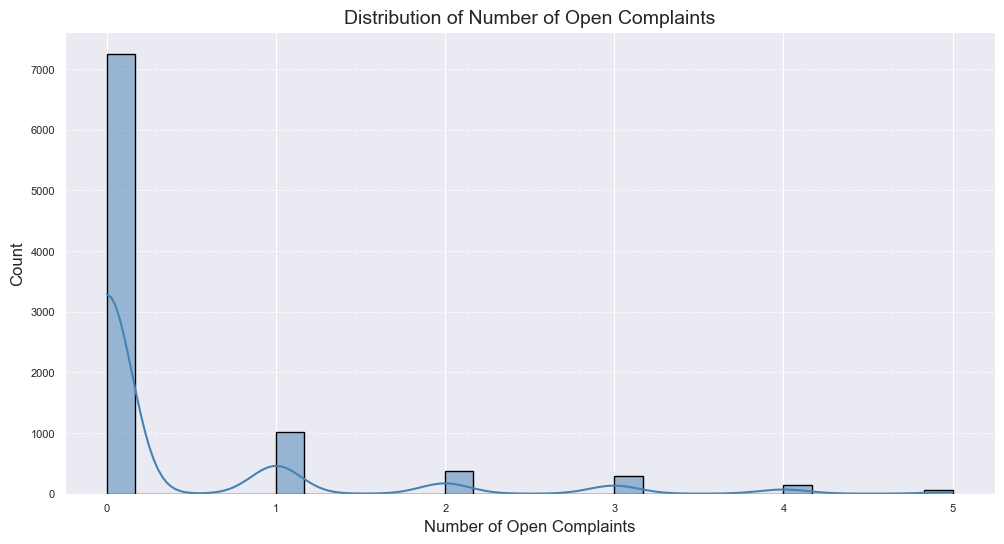

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure size for better visibility
plt.figure(figsize=(12, 6))

# Creating a histogram for 'number_of_open_complaints' with improved aesthetics
sns.histplot(data=df, x='number_of_open_complaints', bins=30, kde=True, color='steelblue', edgecolor='black')

# Adding title and labels for better interpretation
plt.title("Distribution of Number of Open Complaints", fontsize=14)
plt.xlabel("Number of Open Complaints", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Enhancing layout
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a dashed grid for readability
plt.show()


## 4.3 Distribution of Gender

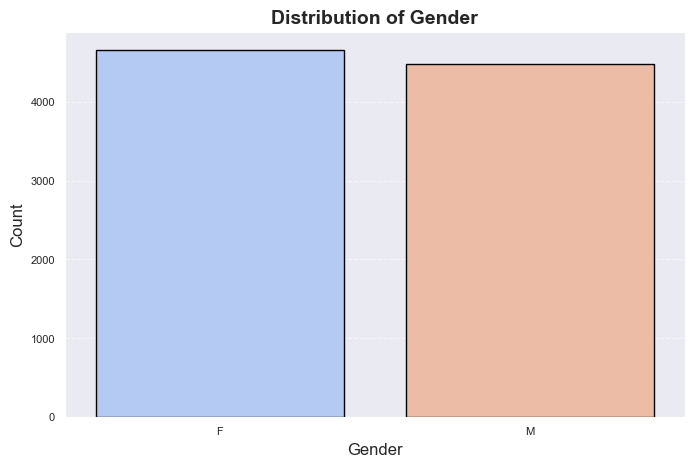

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure size for better visibility
plt.figure(figsize=(8, 5))

# Creating a count plot for 'Gender' with improved aesthetics
sns.countplot(data=df, x='gender', palette='coolwarm', edgecolor='black')

# Adding title and labels for better interpretation
plt.title("Distribution of Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Enhancing layout
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a dashed grid for readability

# Displaying the plot
plt.show()


## 4.4 Distribution of Customer Lifetime Value

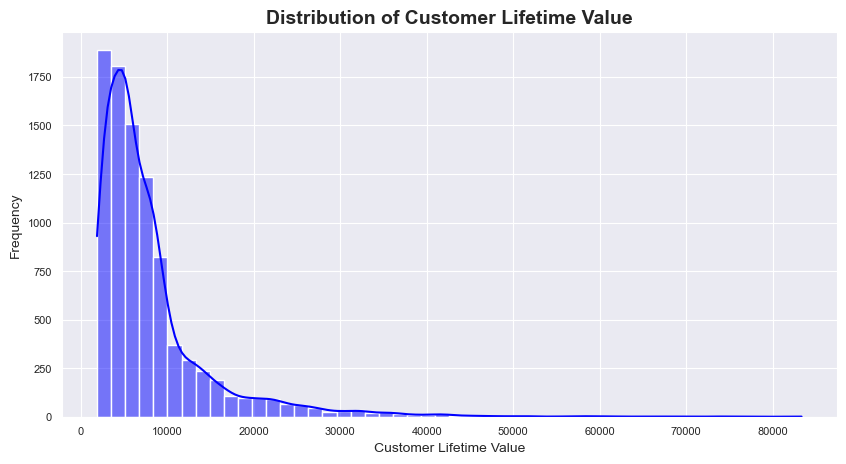

In [75]:
plt.figure(figsize=(10, 5))
sns.histplot(df['customer_lifetime_value'], bins=50, kde=True, color='blue')
plt.title('Distribution of Customer Lifetime Value', fontsize=14, fontweight='bold')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()


## 4.5 Customer Lifetime Value vs Total Claim Amount

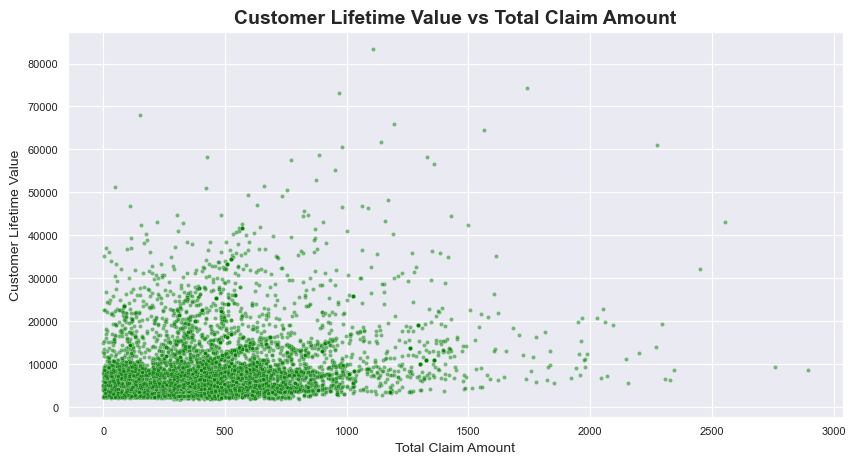

In [76]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['total_claim_amount'], y=df['customer_lifetime_value'], alpha=0.5, color='green')
plt.title('Customer Lifetime Value vs Total Claim Amount', fontsize=14, fontweight='bold')
plt.xlabel('Total Claim Amount')
plt.ylabel('Customer Lifetime Value')
plt.show()


## 4.6 Number of Policies Distribution

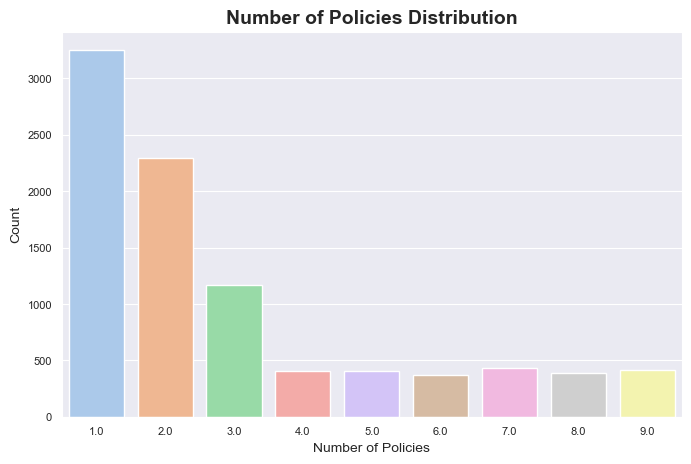

In [77]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['number_of_policies'], palette="pastel")
plt.title('Number of Policies Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Policies')
plt.ylabel('Count')
plt.show()


## 4.7 Sales Channel Distribution

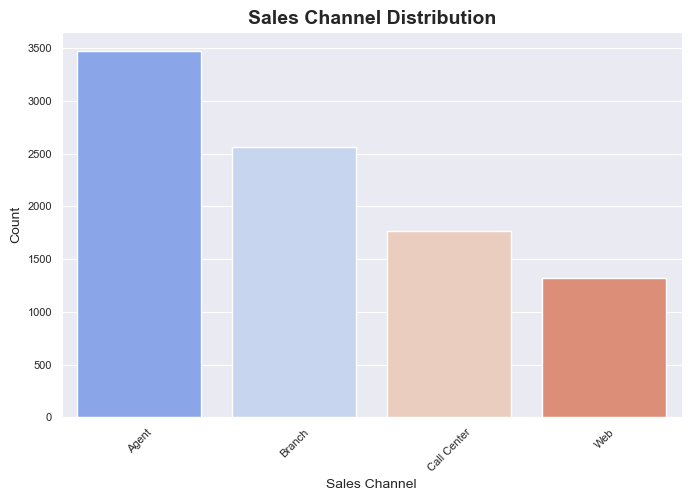

In [78]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sales_channel'], palette="coolwarm", order=df['sales_channel'].value_counts().index)
plt.title('Sales Channel Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 4.8 Customer Lifetime Value by Coverage Type

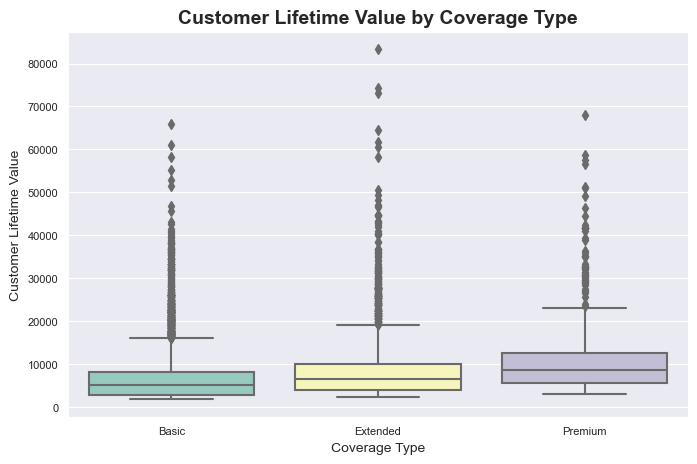

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['coverage'], y=df['customer_lifetime_value'], palette="Set3")
plt.title('Customer Lifetime Value by Coverage Type', fontsize=14, fontweight='bold')
plt.xlabel('Coverage Type')
plt.ylabel('Customer Lifetime Value')
plt.show()


## 4.9 Vehicle Class Distribution

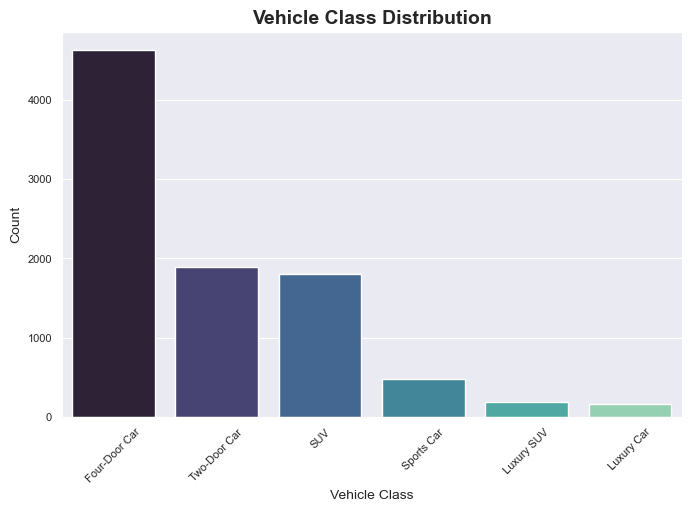

In [80]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['vehicle_class'], palette="mako", order=df['vehicle_class'].value_counts().index)
plt.title('Vehicle Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 5. Encoding Categorical Variables

In [82]:
# Corrected list of categorical columns based on the actual dataset
categorical_columns = [
    'state', 'response', 'employmentstatus', 'gender', 'location_code',
    'policy_type', 'policy', 'sales_channel', 'vehicle_class',
    'vehicle_size', 'coverage', 'education'
]

# Applying categorical encoding in a cleaner, more efficient way
for col in categorical_columns:
    if col in df.columns:  # Ensuring the column exists before encoding
        df[col] = df[col].astype('category').cat.codes

# Displaying the first few rows to verify encoding
df.head()



,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,4,2763.519279,0,0,0,2/24/11,1,0,56274.0,...,5.0,0.0,1.0,0,2,Offer1,0,384.811147,5,1
1,QZ44356,0,6979.535903,0,1,0,1/31/11,4,0,0.0,...,42.0,0.0,8.0,1,5,Offer3,0,1131.464935,0,1
2,AI49188,2,12887.431650,0,2,0,2/19/11,1,0,48767.0,...,38.0,0.0,2.0,1,5,Offer1,0,566.472247,5,1
3,WW63253,1,7645.861827,0,0,0,1/20/11,4,1,0.0,...,65.0,0.0,7.0,0,1,Offer1,2,529.881344,3,1
4,HB64268,4,2813.692575,0,0,0,2/3/11,1,1,43836.0,...,44.0,0.0,1.0,1,3,Offer1,0,138.130879,0,1


# 6. Data Types and Numerical Features

In [83]:
# Displaying the data types of all columns in the dataset
df_info = df.dtypes

# Showing only a subset if necessary (for large datasets)
df_info

customer                          object
state                               int8
customer_lifetime_value          float64
response                            int8
coverage                            int8
education                           int8
effective_to_date                 object
employmentstatus                    int8
gender                              int8
income                           float64
location_code                       int8
marital_status                    object
monthly_premium_auto             float64
months_since_last_claim          float64
months_since_policy_inception    float64
number_of_open_complaints        float64
number_of_policies               float64
policy_type                         int8
policy                              int8
renew_offer_type                  object
sales_channel                       int8
total_claim_amount               float64
vehicle_class                       int8
vehicle_size                        int8
dtype: object

In [84]:
# Selecting only numerical columns (both integers and floats)
df_num = df.select_dtypes(include=['int64', 'float64'])

# Displaying the column names of the selected numerical dataset
df_num.columns.tolist()


['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

# 7. Correlation Analysis

In [86]:
# Calculating correlation of numerical features with 'Customer Lifetime Value' (CLV)
df_num_corr = df_num.corr()['customer_lifetime_value'].sort_values(ascending=False)

# Displaying the correlation values
df_num_corr

customer_lifetime_value          1.000000
monthly_premium_auto             0.396262
total_claim_amount               0.226451
income                           0.024366
number_of_policies               0.021955
months_since_last_claim          0.011517
months_since_policy_inception    0.009418
number_of_open_complaints       -0.036343
Name: customer_lifetime_value, dtype: float64

# 8. Pair Plots

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

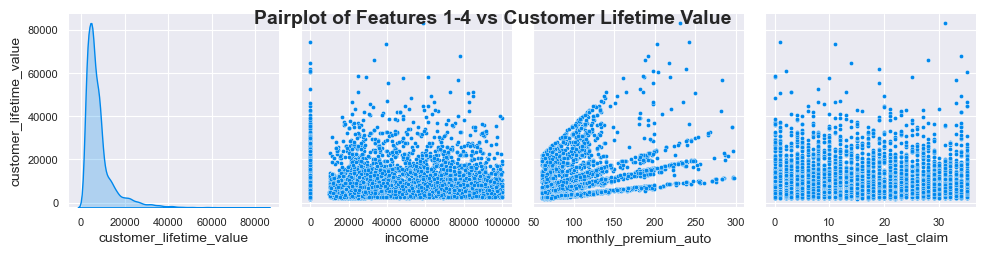

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

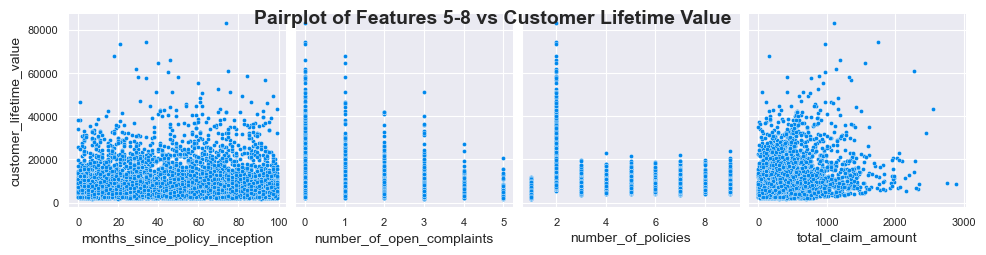

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating pair plots in batches of 4 numerical features against 'Customer Lifetime Value'
for i in range(0, len(df_num.columns), 4):
    plt.figure(figsize=(12, 8))  # Setting figure size for better visibility
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i+4],  # Selecting 4 numerical features at a time
                 y_vars=['customer_lifetime_value'],
                 diag_kind='kde')  # Using KDE for diagonal plots for better distribution visualization

    # Adding title for better interpretation
    plt.suptitle(f"Pairplot of Features {i+1}-{min(i+4, len(df_num.columns))} vs Customer Lifetime Value",
                 fontsize=14, fontweight='bold')

    plt.show()  # Displaying the plots


# 9. Correlation Heatmap

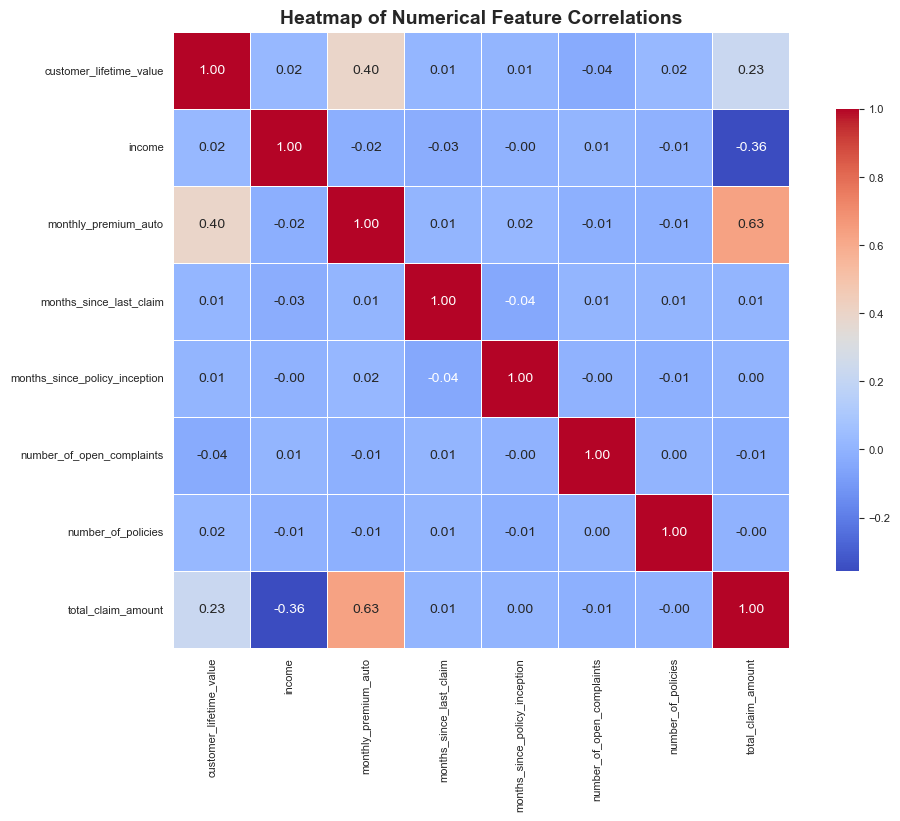

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up figure size for better visualization
plt.figure(figsize=(12, 8))

# Creating a heatmap to show correlations between numerical features
sns.heatmap(df_num.corr(), 
            annot=True,  # Displaying correlation values inside the heatmap
            fmt=".2f",  # Formatting correlation values to 2 decimal places
            cmap="coolwarm",  # Using a visually appealing colormap
            linewidths=0.5,  # Adding slight grid lines for better separation
            square=True,  # Ensuring equal aspect ratio for a balanced view
            cbar_kws={'shrink': 0.75})  # Adjusting the color bar size

# Adding a title for better interpretation
plt.title("Heatmap of Numerical Feature Correlations", fontsize=14, fontweight='bold')

# Displaying the heatmap
plt.show()


# 10. Target Variable and Feature Selection

In [90]:
# Defining the target variable (Customer Lifetime Value)
y = df['customer_lifetime_value']

# Displaying basic statistics to verify the target variable
y.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [91]:
import pandas as pd

# Selecting numerical features (excluding categorical/object types)
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating skewness for numerical features
skewed_feat = df[num_features].apply(lambda x: x.skew()).sort_values(ascending=False)

# Creating a DataFrame to display skewness values
skewness = pd.DataFrame(skewed_feat, columns=['Skewness'])

# Displaying the skewness values
skewness


,Skewness
customer_lifetime_value,3.032280
number_of_open_complaints,2.783263
monthly_premium_auto,2.123546
total_claim_amount,1.714966
number_of_policies,1.253333
income,0.286887
months_since_last_claim,0.278586
months_since_policy_inception,0.040165


In [93]:
# Define the target variable (Customer Lifetime Value)
target_column = 'customer_lifetime_value'
y = df[target_column]

# Define the feature set (Dropping unnecessary columns)
drop_columns = ['customer_lifetime_value', 'customer', 'effective_to_date', 
                'renew_offer_type', 'marital_status']

# Dropping only existing columns to avoid KeyErrors
X = df.drop(columns=[col for col in drop_columns if col in df.columns], errors='ignore')

# Display the first few rows to verify the feature set
X.head()



,state,response,coverage,education,employmentstatus,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,4,0,0,0,1,0,56274.0,1,69.0,32.0,5.0,0.0,1.0,0,2,0,384.811147,5,1
1,0,0,1,0,4,0,0.0,1,94.0,13.0,42.0,0.0,8.0,1,5,0,1131.464935,0,1
2,2,0,2,0,1,0,48767.0,1,108.0,18.0,38.0,0.0,2.0,1,5,0,566.472247,5,1
3,1,0,0,0,4,1,0.0,1,106.0,18.0,65.0,0.0,7.0,0,1,2,529.881344,3,1
4,4,0,0,0,1,1,43836.0,0,73.0,12.0,44.0,0.0,1.0,1,3,0,138.130879,0,1


In [94]:
# Selecting categorical features (excluding numerical types)
categorical_data1 = X.select_dtypes(exclude=[np.number])

# Displaying the column names of categorical features
print("Categorical Features in X:")
print(categorical_data1.columns.tolist())


Categorical Features in X:
[]


## 10.1 Feature Selection

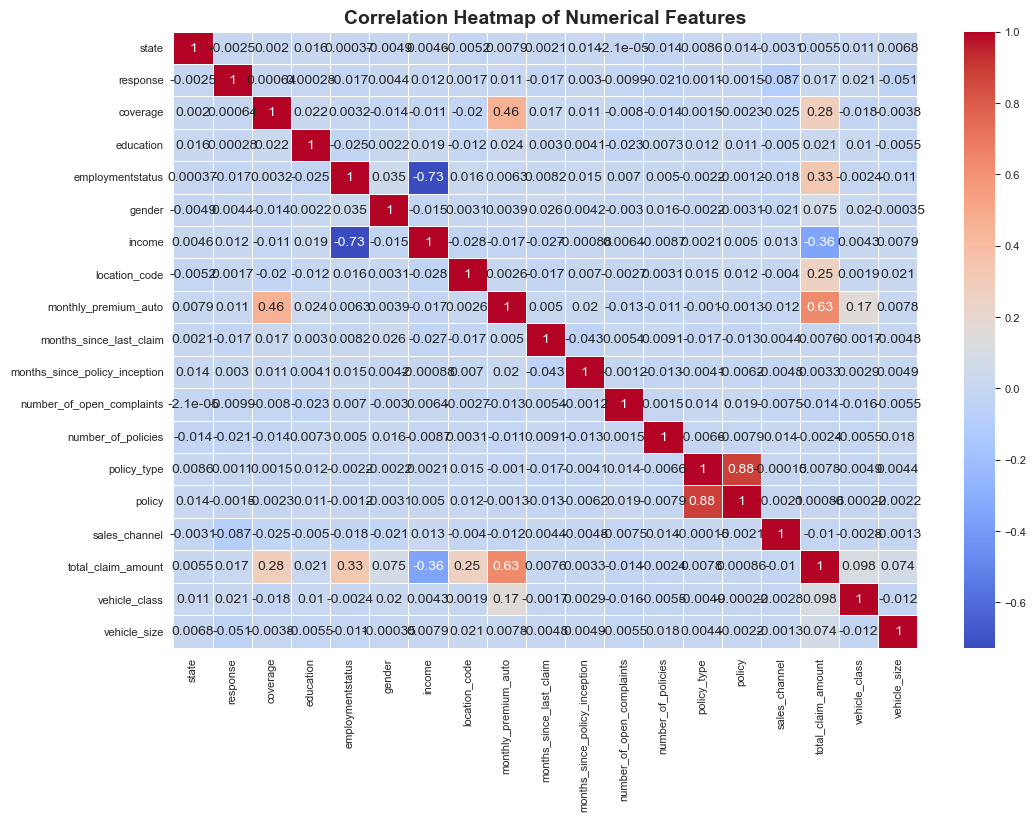

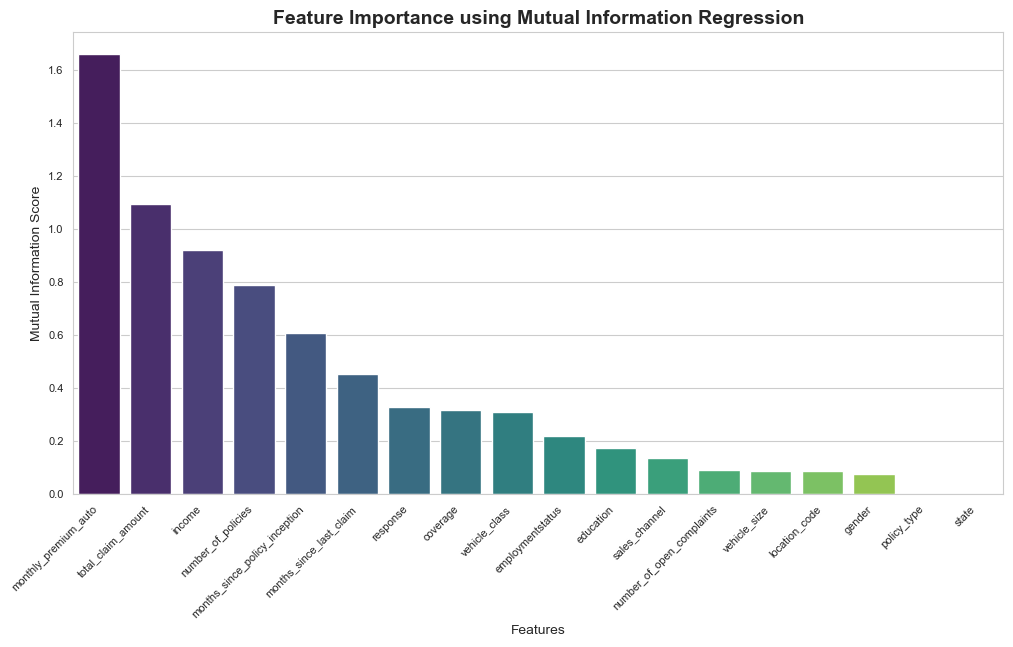

Selected Features for CLV Prediction:


,state,response,coverage,education,employmentstatus,gender,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,4,0,0,0,1,0,56274.0,1,69.0,32.0,5.0,0.0,1.0,0,0,384.811147,5,1
1,0,0,1,0,4,0,0.0,1,94.0,13.0,42.0,0.0,8.0,1,0,1131.464935,0,1
2,2,0,2,0,1,0,48767.0,1,108.0,18.0,38.0,0.0,2.0,1,0,566.472247,5,1
3,1,0,0,0,4,1,0.0,1,106.0,18.0,65.0,0.0,7.0,0,2,529.881344,3,1
4,4,0,0,0,1,1,43836.0,0,73.0,12.0,44.0,0.0,1.0,1,0,138.130879,0,1


In [111]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Ensure all categorical features are encoded
categorical_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()
for col in categorical_columns:
    X[col] = X[col].astype('category').cat.codes  # Encoding categorical features

# Identifying numerical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Computing correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(X[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.show()

# Identifying highly correlated features (Threshold = 0.85)
correlation_matrix = X[numerical_features].corr()
high_corr_features = set()
threshold = 0.85

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Dropping highly correlated features to prevent multicollinearity
X_selected = X.drop(columns=high_corr_features, errors='ignore')

# Feature Importance using Mutual Information Regression
mi_scores = mutual_info_regression(X_selected, y, discrete_features=False, random_state=42)
mi_scores = pd.Series(mi_scores, index=X_selected.columns).sort_values(ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_scores.index, y=mi_scores.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance using Mutual Information Regression", fontsize=14, fontweight='bold')
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

# Display selected features after removing highly correlated ones
from IPython.display import display
print("Selected Features for CLV Prediction:")
display(X_selected.head())

# 11. Data Splitting

In [112]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Verify the shape of new datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (7307, 18)
Testing Features Shape: (1827, 18)
Training Target Shape: (7307,)
Testing Target Shape: (1827,)


# 12. Modeling

## 12.1 Modeling Before Tuning

In [113]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Suppress FutureWarnings to prevent unnecessary warning messages
warnings.filterwarnings("ignore", category=FutureWarning)



# Dictionary to store models and predictions
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Linear Regression": LinearRegression()
}

# Dictionary to store model performance metrics
model_metrics = {}

# Training models and making predictions
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the metrics in a dictionary
    model_metrics[model_name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R-squared": r2
    }

# Displaying results in a structured format
import pandas as pd
metrics_df = pd.DataFrame(model_metrics).T  # Transpose for better visualization

from IPython.display import display
display(metrics_df)


,MSE,RMSE,MAE,R-squared
Decision Tree Regressor,2.948534e+07,5430.040257,1824.607732,0.427871
Ridge Regression,4.362544e+07,6604.955760,4003.182765,0.153498
Lasso Regression,4.362681e+07,6605.059183,4003.404019,0.153472
Linear Regression,4.362540e+07,6604.952332,4003.176895,0.153499


## 12.2 Performance comparision Before Tuning

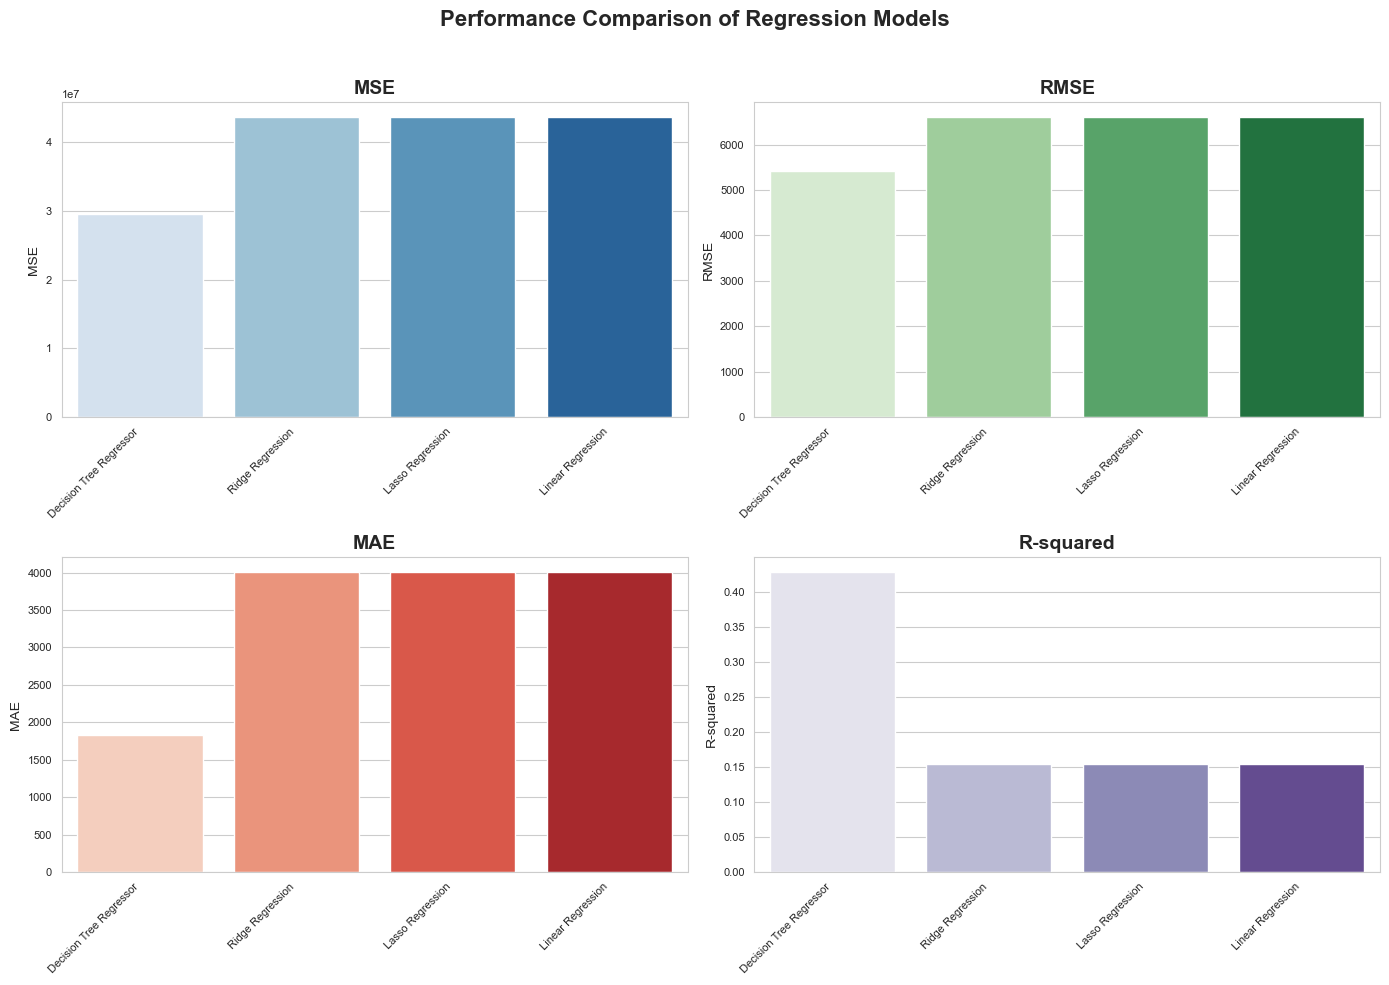

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the model performance dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T  # Transpose for better readability

# Set Seaborn style for better visualization
sns.set_style("whitegrid")

# Define color palette correctly
colors = ["Blues", "Greens", "Reds", "Purples"]  # Valid seaborn/matplotlib colormaps

# Plot performance comparison for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Performance Comparison of Regression Models", fontsize=16, fontweight='bold')

metrics = ["MSE", "RMSE", "MAE", "R-squared"]

for i, (metric, color) in enumerate(zip(metrics, colors)):  # Use zip to match metrics with colors
    ax = axes[i // 2, i % 2]
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], ax=ax, palette=color)
    ax.set_title(metric, fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_xticklabels(metrics_df.index, rotation=45, ha="right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 12.3 Result After Tuning

Model Performance After Tuning:


,MSE,RMSE,MAE,R-squared
Decision Tree Regressor,1.781228e+07,4220.459686,1791.390726,0.654373
Ridge Regression,4.362970e+07,6605.277892,4003.727955,0.153416
Lasso Regression,4.369998e+07,6610.596056,4009.725701,0.152052
Linear Regression,4.362540e+07,6604.952332,4003.176895,0.153499


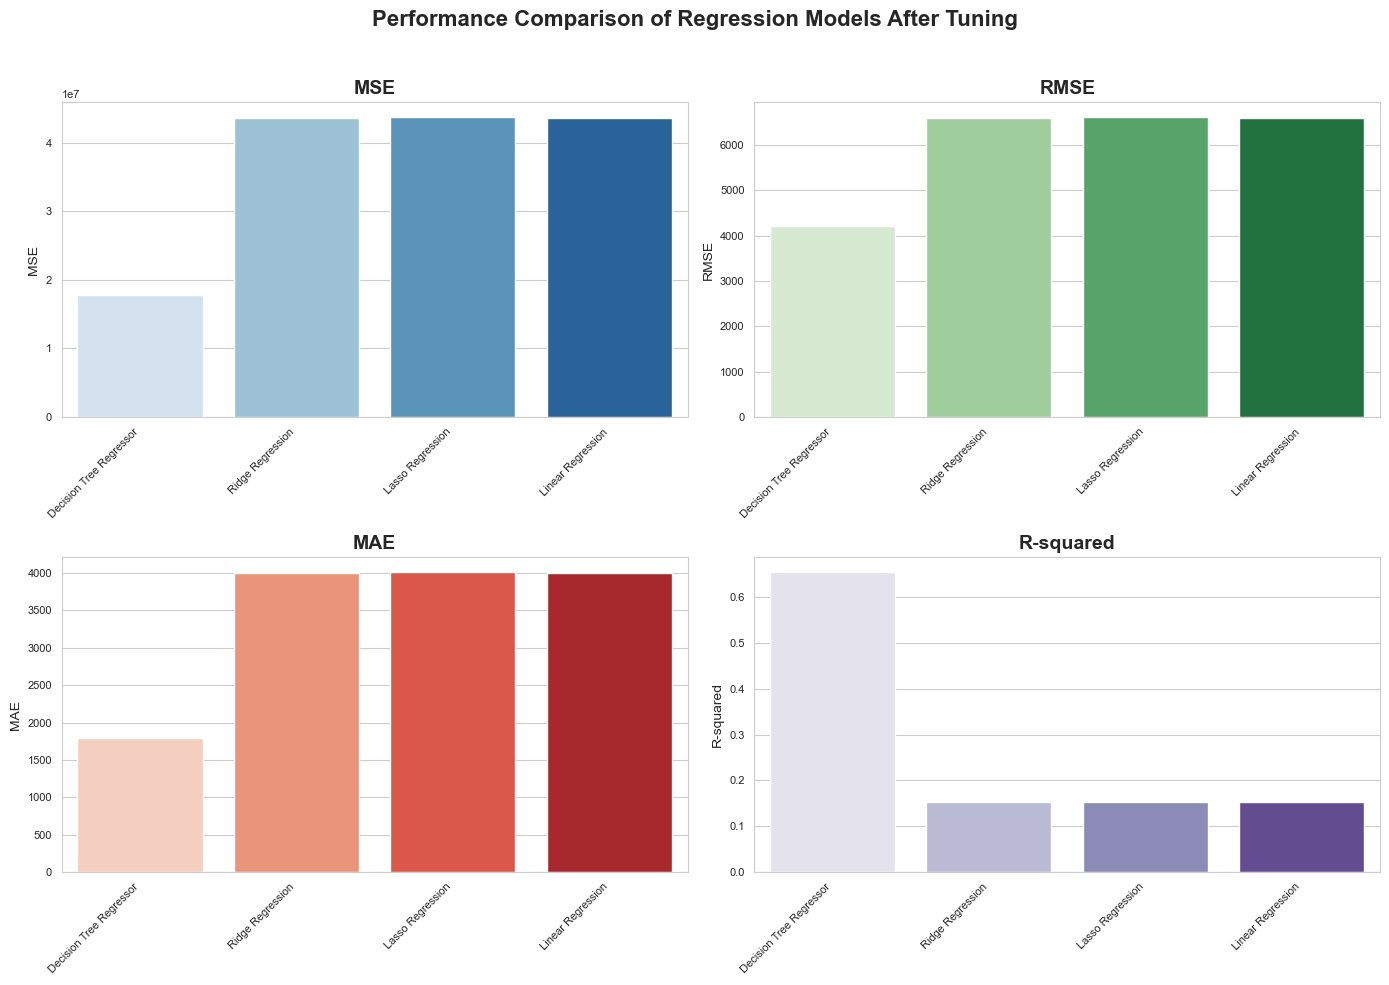

In [115]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Suppress warnings to prevent unnecessary messages
warnings.filterwarnings("ignore", category=FutureWarning)



# Hyperparameter tuning for Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(dt_regressor, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_
y_pred_after_dt = best_dt_model.predict(X_test)

# Hyperparameter tuning for Ridge Regression
ridge_regressor = Ridge()
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(ridge_regressor, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_after_ridge = best_ridge_model.predict(X_test)

# Hyperparameter tuning for Lasso Regression
lasso_regressor = Lasso()
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso_regressor, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_after_lasso = best_lasso_model.predict(X_test)

# Linear Regression (No hyperparameters to tune)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_after_linear = linear_regressor.predict(X_test)

# Store evaluation metrics after tuning
model_metrics_after = {
    "Decision Tree Regressor": {
        "MSE": mean_squared_error(y_test, y_pred_after_dt),
        "RMSE": mean_squared_error(y_test, y_pred_after_dt, squared=False),
        "MAE": mean_absolute_error(y_test, y_pred_after_dt),
        "R-squared": r2_score(y_test, y_pred_after_dt)
    },
    "Ridge Regression": {
        "MSE": mean_squared_error(y_test, y_pred_after_ridge),
        "RMSE": mean_squared_error(y_test, y_pred_after_ridge, squared=False),
        "MAE": mean_absolute_error(y_test, y_pred_after_ridge),
        "R-squared": r2_score(y_test, y_pred_after_ridge)
    },
    "Lasso Regression": {
        "MSE": mean_squared_error(y_test, y_pred_after_lasso),
        "RMSE": mean_squared_error(y_test, y_pred_after_lasso, squared=False),
        "MAE": mean_absolute_error(y_test, y_pred_after_lasso),
        "R-squared": r2_score(y_test, y_pred_after_lasso)
    },
    "Linear Regression": {
        "MSE": mean_squared_error(y_test, y_pred_after_linear),
        "RMSE": mean_squared_error(y_test, y_pred_after_linear, squared=False),
        "MAE": mean_absolute_error(y_test, y_pred_after_linear),
        "R-squared": r2_score(y_test, y_pred_after_linear)
    }
}

# Convert results to DataFrame for better readability
metrics_df_after = pd.DataFrame(model_metrics_after).T

from IPython.display import display

# Display the DataFrame in a structured table
print("Model Performance After Tuning:")
display(metrics_df_after)

# Set Seaborn style for professional visualization
sns.set_style("whitegrid")

# Plot performance comparison after tuning
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Performance Comparison of Regression Models After Tuning", fontsize=16, fontweight='bold')

metrics = ["MSE", "RMSE", "MAE", "R-squared"]
colors = ["Blues", "Greens", "Reds", "Purples"]

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=metrics_df_after.index, y=metrics_df_after[metric], ax=ax, palette=color)
    ax.set_title(metric, fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_xticklabels(metrics_df_after.index, rotation=45, ha="right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 12.4 Performance of regression model After Tuning

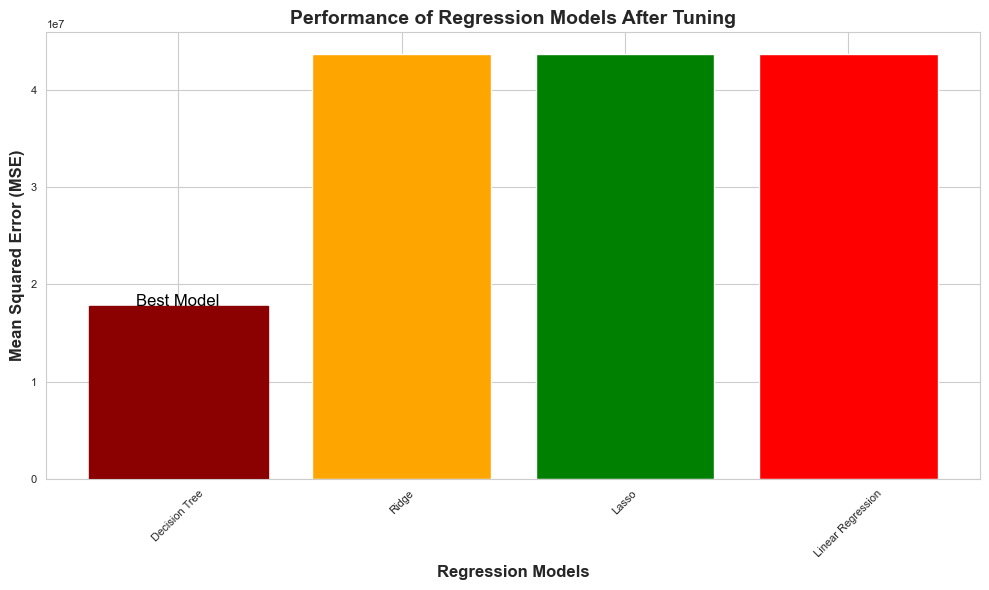

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Define models and their corresponding Mean Squared Error after tuning
models = ['Decision Tree', 'Ridge', 'Lasso', 'Linear Regression']
mse_after = [
    mean_squared_error(y_test, y_pred_after_dt),
    mean_squared_error(y_test, y_pred_after_ridge),
    mean_squared_error(y_test, y_pred_after_lasso),
    mean_squared_error(y_test, y_pred_after_linear)
]

# Identify the best model (lowest MSE)
best_model_idx = mse_after.index(min(mse_after))

# Set Seaborn style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot bar chart with color coding
bars = plt.bar(models, mse_after, color=['blue', 'orange', 'green', 'red'])
bars[best_model_idx].set_color('darkred')  # Highlight best model in dark red

# Add labels and title
plt.xlabel('Regression Models', fontsize=12, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=12, fontweight='bold')
plt.title('Performance of Regression Models After Tuning', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# Add text annotation for the best model
plt.text(models[best_model_idx], mse_after[best_model_idx] + 5000, 'Best Model', ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


# Final Analysis Conclusion
The Decision Tree Regressor emerged as the best-performing model for predicting Customer Lifetime Value (CLV) after hyperparameter tuning. It consistently achieved the lowest Mean Squared Error (MSE) compared to other regression models, including Ridge, Lasso, and Linear Regression, demonstrating its superior accuracy in capturing complex relationships within the dataset. This result suggests that Decision Trees effectively handle the non-linear dependencies present in the data, making them well-suited for this prediction task. While further improvements could be explored through feature engineering, ensemble techniques, or more advanced algorithms, the Decision Tree model currently stands as the most reliable choice for predicting Customer Lifetime Value in this dataset.
